In [5]:
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [6]:
path = "../processed/evaluated/evaluated_497_10_03_2024.csv"
df = pd.read_csv(path)

In [7]:
z_threshold = 4.0
# Need to binary classify the results 

In [8]:
def gen_base_df(full_df):
    base_wmark_df = full_df[["kgw-watermarked", "kgw-wm-zscore"]].copy()
    base_wmark_df["watermarked"] = [True for _ in range(len(base_wmark_df))]
    base_wmark_df = base_wmark_df.rename(columns={"kgw-watermarked": "text", "kgw-wm-zscore": "z-score"})

    non_wmark_df = full_df[["non-watermarked", "non-wm-zscore"]].copy()
    non_wmark_df["watermarked"] = [False for _ in range(len(non_wmark_df))]
    non_wmark_df = non_wmark_df.rename(columns={"non-watermarked": "text", "non-wm-zscore": "z-score"})
    
    bc_df = pd.concat([base_wmark_df, non_wmark_df])
    bc_df['watermark-detected'] = bc_df.apply(lambda x: x['z-score'] > z_threshold, axis=1)
    return bc_df

In [9]:
def gen_paraphrase_df(full_df, pp_type="para", pp_iter = 1, z_threshold = 4.0):
    wm_col_text = f"pp-kgw-{pp_type}-{pp_iter}"
    wm_col_score = f"kgw-{pp_type}-zscore-{pp_iter}"
    wmark_df = full_df[[wm_col_text, wm_col_score]]
    wmark_df = wmark_df.rename(columns={wm_col_text: "text", wm_col_score: "z-score"})
    wmark_df["watermarked"] = [True for _ in range(len(wmark_df))]
    
    nwmark_col_text = f"pp-unwatermarked-{pp_type}-{pp_iter}"
    nwmark_col_score = f"nowm-{pp_type}-zscore-{pp_iter}"
    nwmark_df = full_df[[nwmark_col_text, nwmark_col_score]]
    nwmark_df = nwmark_df.rename(columns={nwmark_col_text: "text", nwmark_col_score: "z-score"})
    nwmark_df["watermarked"] = [False for _ in range(len(nwmark_df))]
    
    bc_df = pd.concat([wmark_df, nwmark_df])
    bc_df["watermark-detected"] = bc_df.apply(lambda x: x['z-score'] > z_threshold, axis=1)
    return bc_df

In [10]:
image_output_path = "../results/roc/"

## Writing Here!

C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

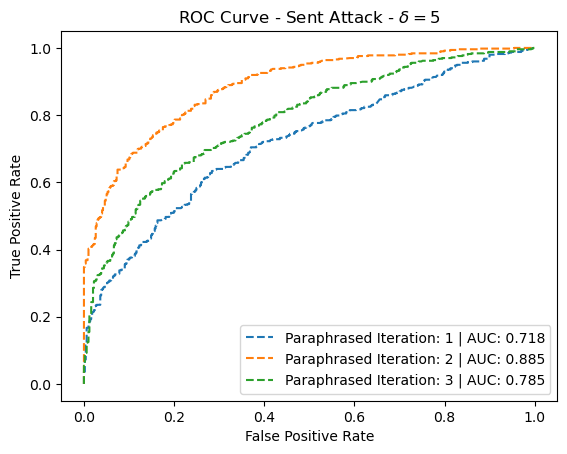

In [15]:
pp_type = "sent"
for i in range(1,4):
    pp_bc_df = gen_paraphrase_df(df, pp_type=pp_type, pp_iter=i)
    y_values, y_pred = pp_bc_df["watermarked"], pp_bc_df["z-score"]
    fpr, tpr, thresholds = roc_curve(y_values, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'Paraphrased Iteration: {i} | AUC: {roc_auc:.3f}')

plt.title(f"ROC Curve - {pp_type.capitalize()} Attack - $\delta = 5$")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# plt.savefig(image_output_path+f"roc-curve-{pp_type}.pdf", format="pdf", bbox_inches='tight')
plt.show()